# Deep Learning
# DL10 Capa Maxpool



## <font color='blue'>**Capa de  Maxpooling**</font>
<p style='text-align: justify;'>

En este notebook, agregamos y visualizamos la salida de una capa __Maxpooling__ en una __CNN__.

Una capa convolucional + función de activación, seguida de una capa maxpooling y una capa lineal (para crear un tamaño de salida deseado) forman las capas básicas de una CNN.

<img alt="CNN"  src="https://drive.google.com/uc?export=view&id=1fq1TSTon7SLKPvZdkgVDR0xRC_LCqATM" width=600px>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importando la imagen.

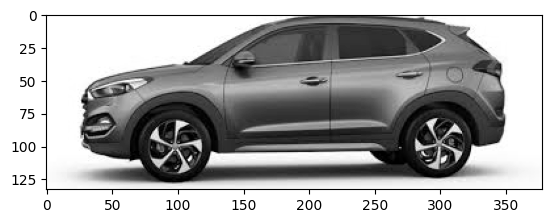

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# la ruta de la imagen.
img_path = '/content/drive/MyDrive/Curso/Industria Inteligente/2023-2S/Datos/Auto.jfif'

# Cargandola.
bgr_img = cv2.imread(img_path)
# Convirtiendola a escala de gris.
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# Normalizando.
gray_img = gray_img.astype("float32")/255

# Dibujando.
plt.imshow(gray_img, cmap='gray')
plt.show()

### Defina y visualice los filtros.

In [ ]:
import numpy as np

## Definamos un filtro convolucional.
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)


Filter shape:  (4, 4)


In [ ]:
# Generemos variaciones del filtro.

filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# Veamos un filtro cualquiera.
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


### Defina las capas convolucionales y pooling.

A continuacion vamos a ver una __Pooling layer__.

Una capa de Maxpooling reduce el tamaño $x-y$ de una entrada y solo mantiene los valores de los pixeles más *activos* de la entrada original. A continuación, se muestra un ejemplo de un kernel de agrupación de 2x2, con un paso (_stride_) de 2 pixeles, aplicado a una pequeña sección (parche o _patch_) de valores de píxeles de una imagen en escala de grises; vemos como reduce el tamaño $x-y$ del parche en un factor de 2. Solo los valores máximos de píxeles en 2x2 permanecen en la nueva salida agrupada.

<img alt="maxpool"  src="https://drive.google.com/uc?export=view&id=1sJjTi6B7U8KS2LLIBzv9opHiFEqKfkzl" width=600px>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Definamos nuestra red convolucional con una capa de maxpooling de tamaño (2,2).

class Net(nn.Module):

    def __init__(self, weight):
        super(Net, self).__init__()
        # inicializa los pesos de la capa convolucional para que tengan la forma de los pesos de los 4 filtros definidos
        k_height, k_width = weight.shape[2:]
        # Define 4 filtros.
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        # Asigna los pesos con los filtros definidos por weight.
        self.conv.weight = torch.nn.Parameter(weight)
        # Y definimos una Maxpool de 2x2.
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)

        # returnamos Todas las capas.
        return conv_x, activated_x, pooled_x

# Instanciamos model asignando los pesos.
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


## <font color='green'>**Actividad 1**</font>

En esta actividad utilizaremos el código construido en el notebook __8_Filtros_Convolucionales.ipynb__ para visualizar la salida de las capas max pool.

### Visualicemos la salida.
Definimos la funcion que permite visualizar.

In [ ]:
# función auxiliar para visualizar la salida de una capa determinada
# el número predeterminado de filtros es 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(30, 20))

    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

Veamos el resultado de una capa convolucional después de aplicar una función de activación ReLu.

<img alt="ReLu activation"  src="https://drive.google.com/uc?export=view&id=1gWJkNE9ohn0mR6EbKTCNNvIECt7Ko8Hl" width=600px>

### Visualizando la salida de la capa maxpooling.

La capa de pooling toma como entrada las  características que se muestran arriba y reduce la dimensionalidad de ellas, por algún factor de agrupación, al construir una imagen nueva y más pequeña con solo los valores máximos (más brillantes) en un área de kernel dada.

Eche un vistazo a los valores en los ejes $x$ e $y$ para ver cómo la imagen ha cambiado de tamaño.



<font color='green'>Fin Actividad 1</font>

<img src="https://drive.google.com/uc?export=view&id=1DNuGbS1i-9it4Nyr3ZMncQz9cRhs2eJr" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='green'>**Capas Pooling**</font>

**Capas de Max Pooling**

Las capas de Max Pooling son operaciones comunes en las arquitecturas de redes neuronales, especialmente en las Redes Neuronales Convolucionales (CNN). Su función principal es reducir progresivamente la dimensionalidad espacial (alto x ancho) de la entrada, lo que ayuda a disminuir la cantidad de parámetros y cálculos en la red. A continuación, detallo cómo funciona y su utilidad:

1. Operación: Max pooling opera en cada característica (o canal) por separado. Dada una ventana (por ejemplo, de 2x2), selecciona el valor máximo de esa ventana y lo utiliza como valor de salida. Esta ventana se desplaza por toda la entrada con cierto paso (stride) para producir una nueva matriz de salida reducida.

2. Reducción de Dimensionalidad: A través de esta operación, las capas de Max Pooling reducen la cantidad de parámetros de la red, lo que a su vez reduce el tiempo de entrenamiento y el riesgo de sobreajuste.

3. Invarianza a pequeñas transformaciones: Max pooling introduce cierta invarianza a la translación. Si una característica (por ejemplo, un borde) se detectó en una posición y luego se mueve ligeramente en la imagen, el max pooling aún podrá detectarla.

4. Mantiene las características más importantes: Al tomar el valor máximo dentro de una ventana, la capa de Max Pooling se asegura de conservar las características más prominentes de la imagen.

**Otros tipos de Pooling**

Aparte del Max Pooling, existen otros tipos de pooling, como:

**Average Pooling**: En lugar de tomar el máximo, toma el promedio de los valores en la ventana.

Cuándo se usa:

1. Preservación de información: A diferencia del Max Pooling, que toma solo el valor máximo (una característica dominante), el Average Pooling tiene en cuenta todos los valores de la ventana, lo que puede ser útil para mantener información más general en lugar de características puntualmente destacadas.

2. Evitar características extremadamente activas: En ciertos contextos, puede ser útil evitar que características extremadamente dominantes eclipsen otras. Al tomar el promedio, se evita que un valor extremadamente alto domine completamente la salida.

3. Redes Generativas Adversarias (GANs): En algunas arquitecturas de GANs, se utiliza Average Pooling en el discriminador para obtener características más suaves y menos agresivas.

**Min Pooling** : Selecciona el valor mínimo de la ventana.

Cuándo se usa:

1. Detección de características negativas: Si en un contexto determinado las características negativas (valores bajos) son especialmente relevantes, el Min Pooling puede ser útil.

2. Imágenes de profundidad: En el procesamiento de imágenes de profundidad o mapas de distancia, donde los valores bajos pueden indicar proximidad o relevancia, el Min Pooling puede ser adecuado.

3. Rareza en aplicaciones estándar: En la mayoría de las aplicaciones de procesamiento de imágenes y visión por computadora, el Min Pooling es raro debido a que las características destacadas (valores altos) suelen ser de mayor interés. Sin embargo, en contextos específicos donde los valores bajos tienen significado especial, podría considerarse.

**Aplicaciones más allá de las CNN**

Si bien Max Pooling es más comúnmente asociado con CNNs, se ha utilizado en otros contextos también:

1. Procesamiento de secuencias: En tareas de clasificación de secuencias, a veces se usa max pooling para seleccionar las características más importantes a lo largo de una secuencia.

2. Redes Neuronales Recurrentes (RNN): En combinación con RNNs, especialmente cuando las secuencias son de longitud variable, el max pooling puede ayudar a obtener una representación fija a partir de secuencias de diferentes longitudes.

3. Modelos de lenguaje natural: En algunos modelos para procesamiento de texto, max pooling se ha utilizado para extraer las características más relevantes de una secuencia de embeddings de palabras.